<a href="https://colab.research.google.com/github/Atharva01/Caesium/blob/master/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0-rc3


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

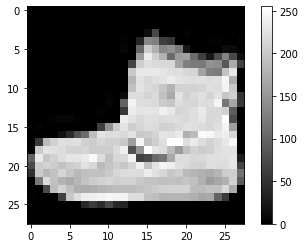

In [44]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
(train_images,test_images) = (train_images/255.0,test_images/255.0)

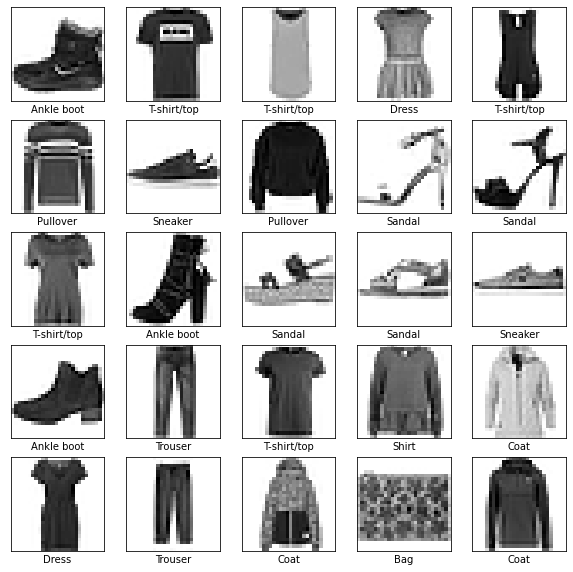

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10)])

In [0]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5009 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3777 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3407 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8828
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2826 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2705 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [50]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=1)
print("\nTest Accuracy : ",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8847

Test Accuracy :  0.8847000002861023


In [51]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose = 2)
print("\n Train Acc:", train_acc)

1875/1875 - 2s - loss: 0.2216 - accuracy: 0.9166

 Train Acc: 0.9165666699409485


In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probabitily_model.predict(test_images)

In [54]:
predictions[0]

array([1.7621888e-09, 3.6023018e-11, 1.0449249e-09, 2.5912689e-10,
       1.4173833e-08, 2.6528610e-04, 1.0926434e-09, 2.9295310e-03,
       1.1939485e-07, 9.9680507e-01], dtype=float32)

In [55]:
np.argmax(predictions[0])

9

In [56]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

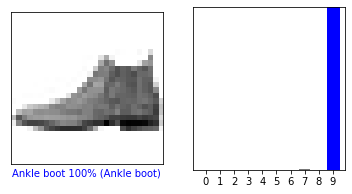

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


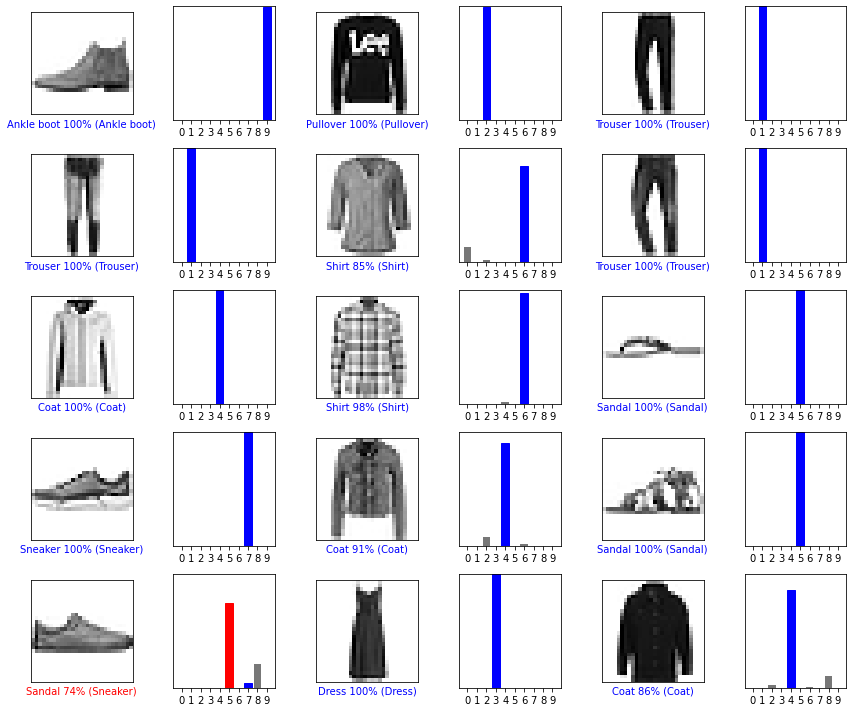

In [59]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [0]:
img = test_images[100]


In [61]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [68]:
predictions_single = probability_model.predict(img)
print(predictions_single)


[[2.7697817e-03 2.5396519e-05 1.5955562e-05 9.9642330e-01 9.1889749e-05
  2.8732066e-07 6.6939415e-04 3.3163652e-10 3.9480506e-06 7.1570113e-08]]


In [70]:
print(np.argmax(predictions_single))

3


In [73]:
class_names[np.argmax(predictions_single)]

'Dress'